In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#df = pd.read_csv('T_11.csv')

In [3]:
df1 = pd.read_csv('T_8.csv') #18

df2 = pd.read_csv('T_9.csv')

df3 = pd.read_csv('T_0.csv')

df4 = pd.read_csv('T_1.csv')

df5 = pd.read_csv('T_2.csv')

df6 = pd.read_csv('T_3.csv') #23 data


In [4]:
df6.isnull().sum().sort_values(ascending = False)

DEST_STATE_FIPS          23589
ORIGIN_STATE_FIPS        23406
DEST_STATE_NM            19721
DEST_STATE_ABR           19721
ORIGIN_STATE_ABR         19487
ORIGIN_STATE_NM          19487
DEST_COUNTRY                 1
YEAR                         0
DEST_WAC                     0
DEST_COUNTRY_NAME            0
ORIGIN_COUNTRY_NAME          0
QUARTER                      0
MONTH                        0
DEST_CITY_NAME               0
DEST                         0
DEST_CITY_MARKET_ID          0
DEST_AIRPORT_SEQ_ID          0
DEST_AIRPORT_ID              0
DISTANCE_GROUP               0
CLASS                        0
ORIGIN_WAC                   0
PASSENGERS                   0
ORIGIN_COUNTRY               0
CARRIER                      0
MAIL                         0
DISTANCE                     0
UNIQUE_CARRIER               0
AIRLINE_ID                   0
UNIQUE_CARRIER_NAME          0
UNIQUE_CARRIER_ENTITY        0
REGION                       0
CARRIER_NAME                 0
FREIGHT 

In [5]:
df1.shape 

(321478, 41)

In [6]:
dfs = [df1, df2, df3, df4, df5, df6]


for i, df in enumerate(dfs, start=1):
    df_cleaned = df.dropna(axis=0)
    
    
    globals()[f'df{i}'] = df_cleaned

In [7]:
df1.shape 

(250340, 41)

In [8]:
for i, df in enumerate(dfs, start=1):
    new_set = df[df['CLASS'].isin(['A', 'C', 'E', 'F', 'G'])]
    
    new_set_cleaned = new_set.dropna(axis=0)
    
    total_passenger = new_set_cleaned.groupby('AIRLINE_ID')['PASSENGERS'].sum()
    
    # market share for each carrier
    market_share = total_passenger / total_passenger.sum()
    
    df = df.merge(market_share.rename('MARKET_SHARE'), left_on='AIRLINE_ID', right_index=True)
    
    df['LOG_MARKET_SHARE'] = np.log(df['MARKET_SHARE'] + 1)
    
    globals()[f'df{i}'] = df
    globals()[f'new_set{i}'] = new_set_cleaned

In [9]:
print(df6.columns, df.shape)

Index(['PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'UNIQUE_CARRIER',
       'AIRLINE_ID', 'UNIQUE_CARRIER_NAME', 'UNIQUE_CARRIER_ENTITY', 'REGION',
       'CARRIER', 'CARRIER_NAME', 'CARRIER_GROUP', 'CARRIER_GROUP_NEW',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'DEST_WAC', 'YEAR', 'QUARTER', 'MONTH', 'DISTANCE_GROUP', 'CLASS',
       'DATA_SOURCE', 'MARKET_SHARE', 'LOG_MARKET_SHARE'],
      dtype='object') (181163, 43)


In [10]:
#df1.to_csv(f'df{i}_output.csv', index=False)

In [11]:
#df1['MARKET_SHARE_LAG'] = 0

In [12]:
print(df1.columns, df.shape)

Index(['PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'UNIQUE_CARRIER',
       'AIRLINE_ID', 'UNIQUE_CARRIER_NAME', 'UNIQUE_CARRIER_ENTITY', 'REGION',
       'CARRIER', 'CARRIER_NAME', 'CARRIER_GROUP', 'CARRIER_GROUP_NEW',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'DEST_WAC', 'YEAR', 'QUARTER', 'MONTH', 'DISTANCE_GROUP', 'CLASS',
       'DATA_SOURCE', 'MARKET_SHARE', 'LOG_MARKET_SHARE'],
      dtype='object') (181163, 43)


In [13]:
#df2['MARKET_SHARE_LAG'] = df1.set_index('AIRLINE_ID')['MARKET_SHARE'].loc[df1['AIRLINE_ID']].values


In [14]:
for index, row in df2.iterrows():
    airline_id = row['AIRLINE_ID']
    
    
    if airline_id in df1['AIRLINE_ID'].values:
        
        df2.at[index, 'MARKET_SHARE_Prev'] = df1.loc[df1['AIRLINE_ID'] == airline_id, 'MARKET_SHARE'].values[0]
    else:
        
        df2.at[index, 'MARKET_SHARE_Prev'] = 0


In [15]:
for index, row in df3.iterrows():
    airline_id = row['AIRLINE_ID']
    
    
    if airline_id in df2['AIRLINE_ID'].values:
        
        df3.at[index, 'MARKET_SHARE_Prev'] = df2.loc[df2['AIRLINE_ID'] == airline_id, 'MARKET_SHARE'].values[0]
    else:
        
        df3.at[index, 'MARKET_SHARE_Prev'] = 0


In [16]:
for index, row in df4.iterrows():
    airline_id = row['AIRLINE_ID']
    
    
    if airline_id in df3['AIRLINE_ID'].values:
        
        df4.at[index, 'MARKET_SHARE_Prev'] = df3.loc[df3['AIRLINE_ID'] == airline_id, 'MARKET_SHARE'].values[0]
    else:
        
        df4.at[index, 'MARKET_SHARE_Prev'] = 0


In [17]:
for index, row in df5.iterrows():
    airline_id = row['AIRLINE_ID']
    
    
    if airline_id in df4['AIRLINE_ID'].values:
        
        df5.at[index, 'MARKET_SHARE_Prev'] = df4.loc[df4['AIRLINE_ID'] == airline_id, 'MARKET_SHARE'].values[0]
    else:
        
        df5.at[index, 'MARKET_SHARE_Prev'] = 0


In [18]:
for index, row in df6.iterrows():
    airline_id = row['AIRLINE_ID']
    
    
    if airline_id in df5['AIRLINE_ID'].values:
        
        df6.at[index, 'MARKET_SHARE_Prev'] = df5.loc[df5['AIRLINE_ID'] == airline_id, 'MARKET_SHARE'].values[0]
    else:
        
        df6.at[index, 'MARKET_SHARE_Prev'] = 0


In [19]:
df1['MARKET_SHARE_Prev'] = 0

In [20]:
df1['MARKET_SHARE_LAG'] = df1['MARKET_SHARE'] - df1['MARKET_SHARE_Prev']

In [21]:
df2['MARKET_SHARE_LAG'] = df2['MARKET_SHARE'] - df2['MARKET_SHARE_Prev']

In [22]:
df3['MARKET_SHARE_LAG'] = df3['MARKET_SHARE'] - df3['MARKET_SHARE_Prev']

In [23]:
df4['MARKET_SHARE_LAG'] = df4['MARKET_SHARE'] - df4['MARKET_SHARE_Prev']

In [24]:
df5['MARKET_SHARE_LAG'] = df5['MARKET_SHARE'] - df5['MARKET_SHARE_Prev']

In [25]:
df6['MARKET_SHARE_LAG'] = df6['MARKET_SHARE'] - df6['MARKET_SHARE_Prev']

In [26]:
#df4.to_csv('df4_output.csv', index=False)

In [27]:
df6.shape

(181163, 45)

In [28]:
# Calculate percentage market share for all rows
df1['PERCENTAGE_MARKET_SHARE'] = df1['MARKET_SHARE'] * 100 

In [29]:
df2['PERCENTAGE_MARKET_SHARE'] = df2['MARKET_SHARE'] * 100 

In [30]:

df3['PERCENTAGE_MARKET_SHARE'] = df3['MARKET_SHARE'] * 100 

In [31]:

df4['PERCENTAGE_MARKET_SHARE'] = df4['MARKET_SHARE'] * 100 

In [32]:

df5['PERCENTAGE_MARKET_SHARE'] = df5['MARKET_SHARE'] * 100 

In [33]:

df6['PERCENTAGE_MARKET_SHARE'] = df6['MARKET_SHARE'] * 100 

In [34]:
df_combined = pd.concat([df1, df2, df3, df4, df5,df6], ignore_index=True)

In [35]:
df_combined.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,...,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,MARKET_SHARE,LOG_MARKET_SHARE,MARKET_SHARE_Prev,MARKET_SHARE_LAG,PERCENTAGE_MARKET_SHARE
0,0.0,0.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,06971,D,2E,...,1,3,1,L,DU,0.000021,0.000021,0.0,0.000021,0.002125
1,0.0,0.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,06971,D,2E,...,4,10,1,L,DU,0.000021,0.000021,0.0,0.000021,0.002125
2,0.0,0.0,0.0,10.0,2E,20319.0,Smokey Bay Air Inc.,06971,D,2E,...,2,6,1,F,DU,0.000021,0.000021,0.0,0.000021,0.002125
3,0.0,0.0,0.0,10.0,2E,20319.0,Smokey Bay Air Inc.,06971,D,2E,...,3,7,1,F,DU,0.000021,0.000021,0.0,0.000021,0.002125
4,0.0,0.0,0.0,10.0,2E,20319.0,Smokey Bay Air Inc.,06971,D,2E,...,4,12,1,F,DU,0.000021,0.000021,0.0,0.000021,0.002125


In [36]:
df_combined = df_combined.drop('PASSENGERS', axis = 1)

In [37]:
df_combined.shape

(1425887, 45)

In [38]:
selected_data = df_combined.groupby(['AIRLINE_ID', 'UNIQUE_CARRIER_NAME','YEAR'])['PERCENTAGE_MARKET_SHARE'].mean().reset_index()

# Get the top 10 rows based on percentage market share
top_10_data = selected_data.nlargest(20, 'PERCENTAGE_MARKET_SHARE')

print(top_10_data[['AIRLINE_ID', 'UNIQUE_CARRIER_NAME', 'PERCENTAGE_MARKET_SHARE','YEAR']])


    AIRLINE_ID     UNIQUE_CARRIER_NAME  PERCENTAGE_MARKET_SHARE  YEAR
0      19393.0  Southwest Airlines Co.                20.443644  2018
4      19393.0  Southwest Airlines Co.                20.402985  2022
5      19393.0  Southwest Airlines Co.                20.218701  2023
3      19393.0  Southwest Airlines Co.                19.919350  2021
2      19393.0  Southwest Airlines Co.                19.844465  2020
1      19393.0  Southwest Airlines Co.                19.520593  2019
66     19805.0  American Airlines Inc.                16.885632  2020
59     19790.0    Delta Air Lines Inc.                16.784464  2019
63     19790.0    Delta Air Lines Inc.                16.754150  2023
67     19805.0  American Airlines Inc.                16.372126  2021
62     19790.0    Delta Air Lines Inc.                16.283758  2022
58     19790.0    Delta Air Lines Inc.                16.256818  2018
69     19805.0  American Airlines Inc.                16.104567  2023
68     19805.0  Amer

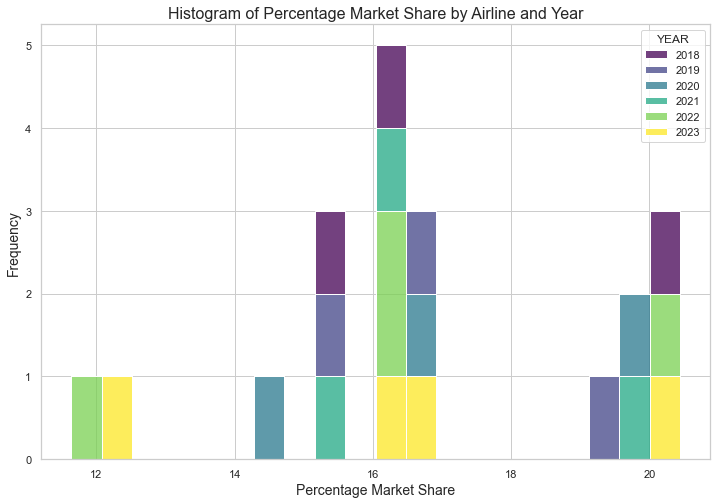

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.histplot(data=top_10_data, x='PERCENTAGE_MARKET_SHARE', hue='YEAR', multiple='stack', bins=20, palette='viridis')

plt.title('Histogram of Percentage Market Share by Airline and Year', fontsize=16)
plt.xlabel('Percentage Market Share', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

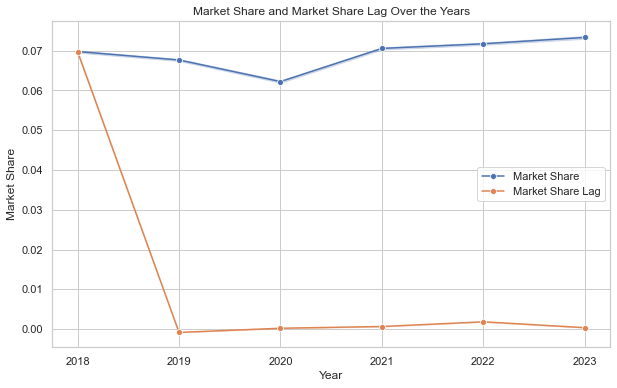

In [40]:

plot_df = df_combined[['YEAR', 'MARKET_SHARE', 'MARKET_SHARE_LAG']]

plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='MARKET_SHARE', data=plot_df, label='Market Share', marker='o')

sns.lineplot(x='YEAR', y='MARKET_SHARE_LAG', data=plot_df, label='Market Share Lag', marker='o')

plt.xlabel('Year')
plt.ylabel('Market Share')
plt.title('Market Share and Market Share Lag Over the Years')
plt.legend()
plt.show()


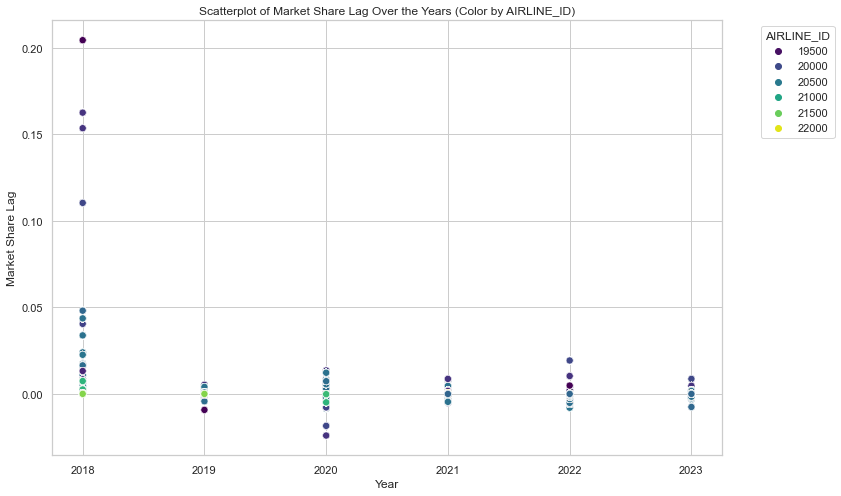

In [66]:
plot_df = df_combined[['YEAR', 'AIRLINE_ID', 'MARKET_SHARE_LAG']]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='YEAR', y='MARKET_SHARE_LAG', hue='AIRLINE_ID', data=plot_df, palette='viridis', s=50)

plt.xlabel('Year')
plt.ylabel('Market Share Lag')
plt.title('Scatterplot of Market Share Lag Over the Years (Color by AIRLINE_ID)')
plt.legend(title='AIRLINE_ID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

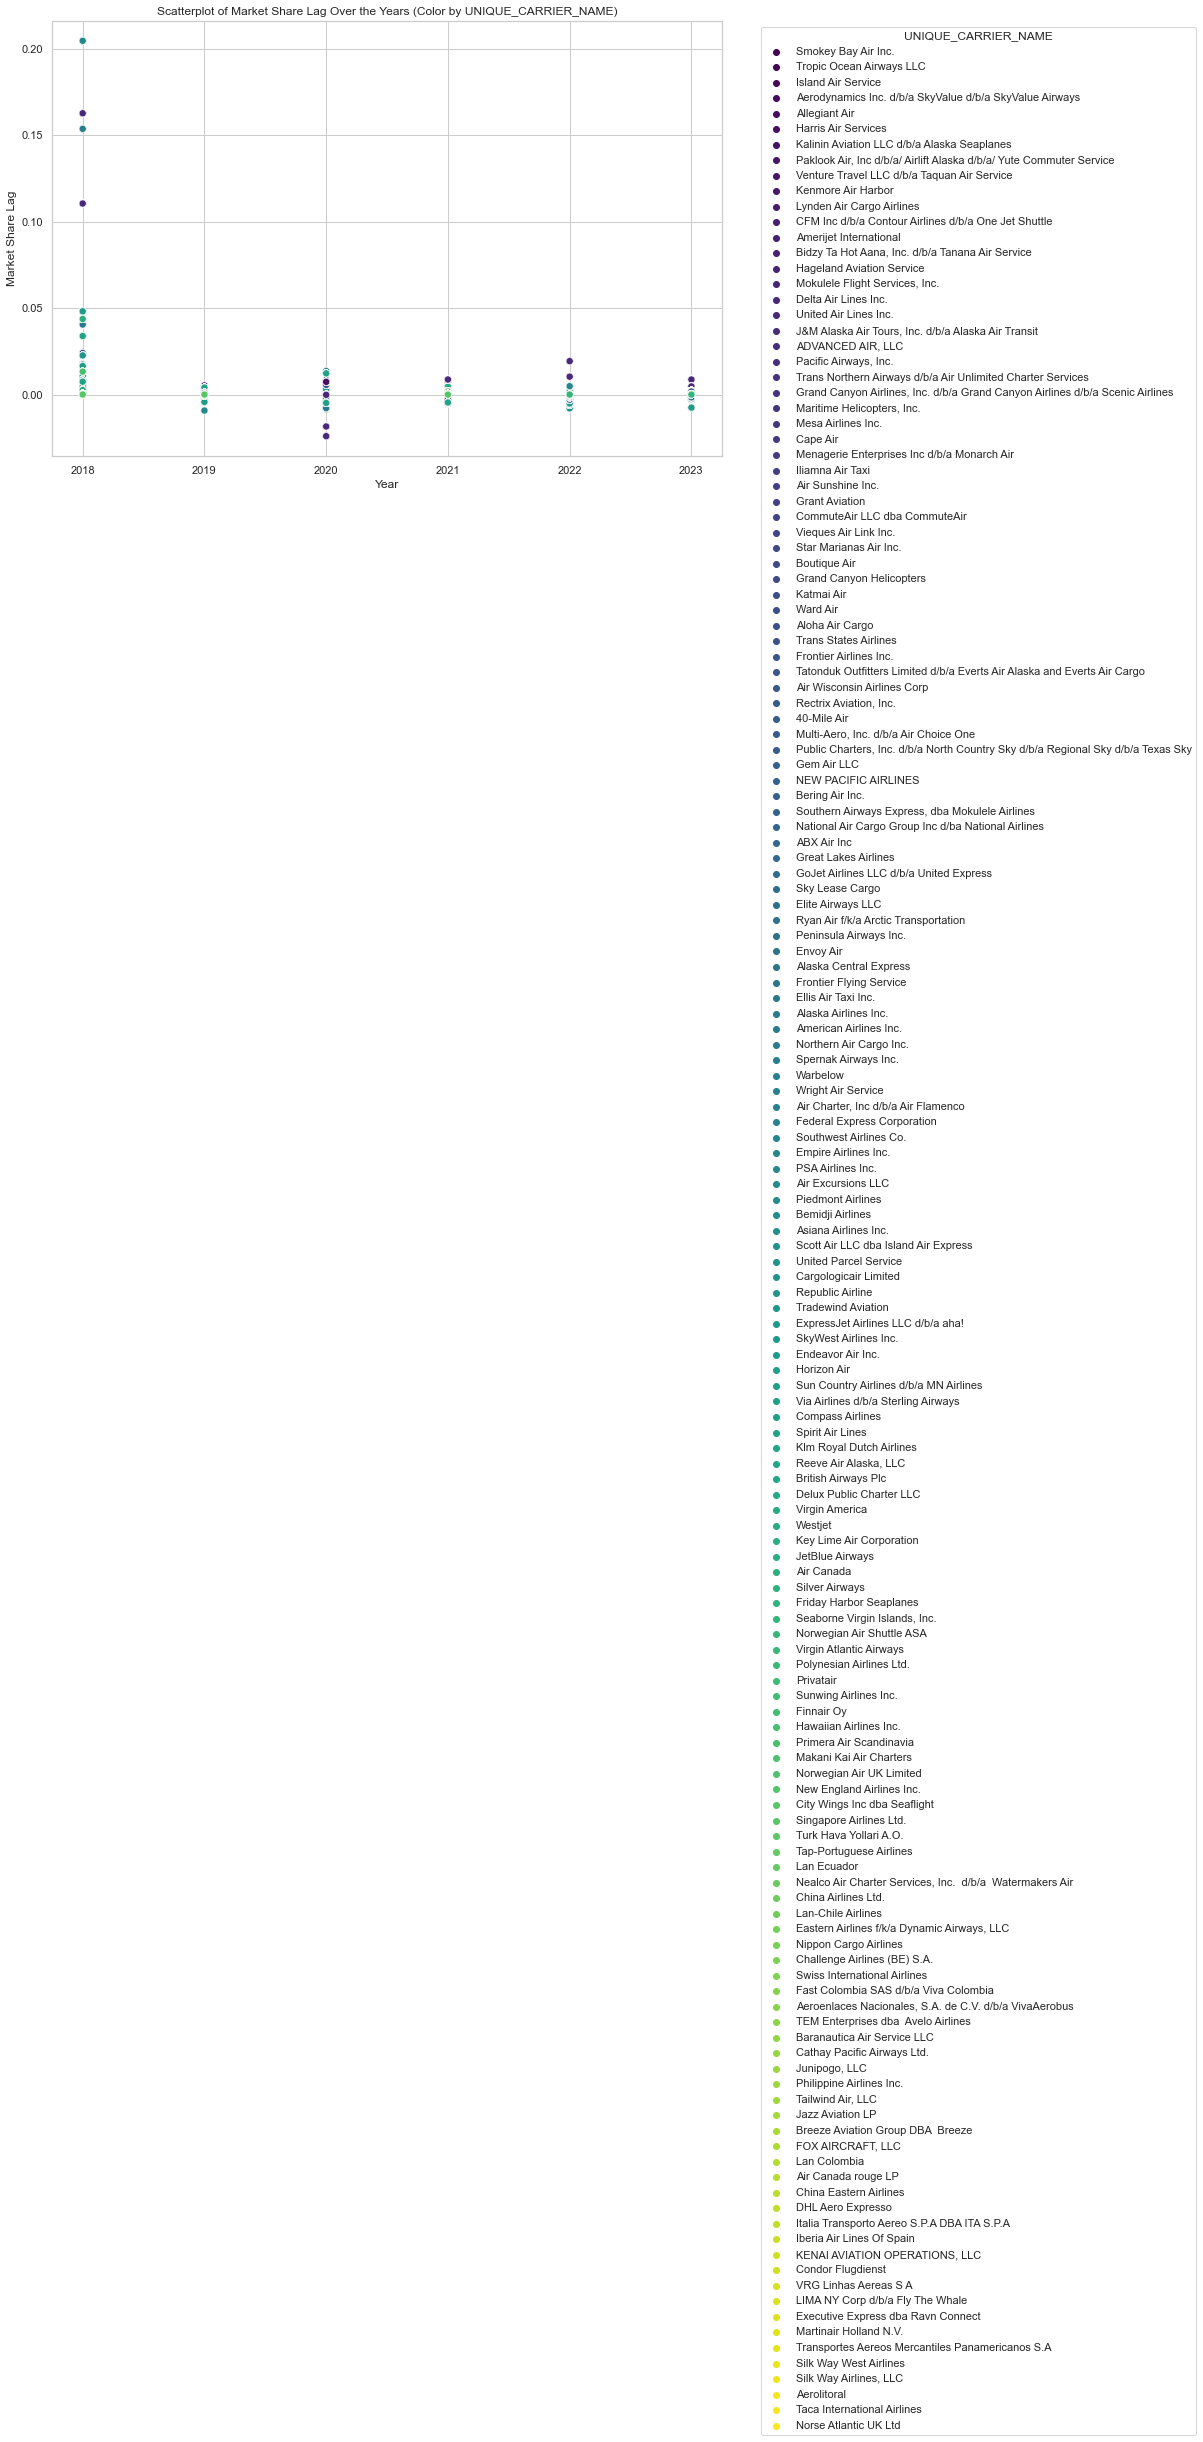

In [67]:
plot_df = df_combined[['YEAR', 'UNIQUE_CARRIER_NAME', 'MARKET_SHARE_LAG']]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='YEAR', y='MARKET_SHARE_LAG', hue='UNIQUE_CARRIER_NAME', data=plot_df, palette='viridis', s=50)

plt.xlabel('Year')
plt.ylabel('Market Share Lag')
plt.title('Scatterplot of Market Share Lag Over the Years (Color by UNIQUE_CARRIER_NAME)')
plt.legend(title='UNIQUE_CARRIER_NAME', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

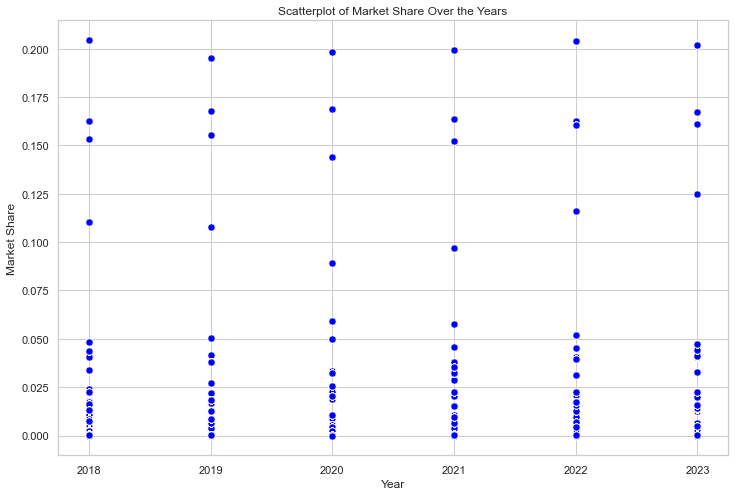

In [42]:
plot_df = df_combined[['YEAR', 'MARKET_SHARE']]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='YEAR', y='MARKET_SHARE', data=plot_df, color='blue', s=50)

plt.xlabel('Year')
plt.ylabel('Market Share')
plt.title('Scatterplot of Market Share Over the Years')

plt.show()

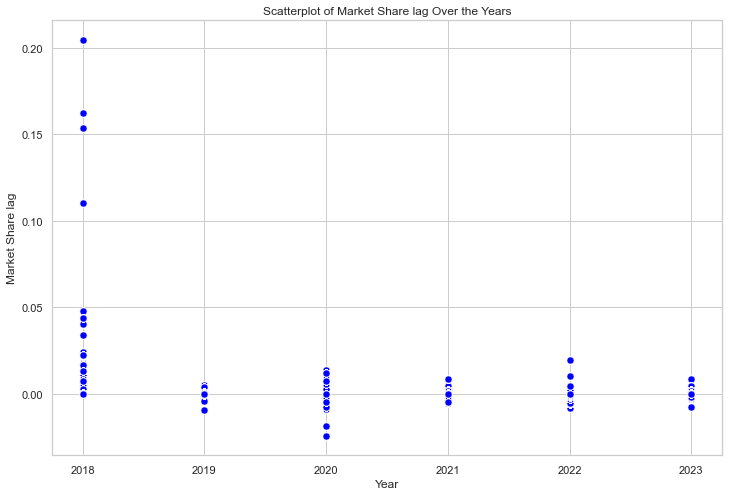

In [43]:

plot_df = df_combined[['YEAR', 'MARKET_SHARE_LAG']]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='YEAR', y='MARKET_SHARE_LAG', data=plot_df, color='blue', s=50)

plt.xlabel('Year')
plt.ylabel('Market Share lag')
plt.title('Scatterplot of Market Share lag Over the Years')

plt.show()

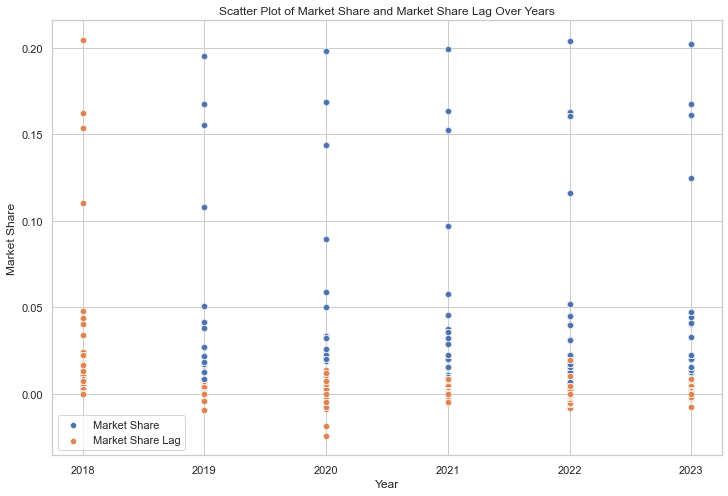

In [44]:
plot_df = df_combined[['YEAR', 'MARKET_SHARE','MARKET_SHARE_LAG']]

plt.figure(figsize=(12, 8))


sns.scatterplot(x='YEAR', y='MARKET_SHARE', data=plot_df, label='Market Share')
sns.scatterplot(x='YEAR', y='MARKET_SHARE_LAG', data=plot_df, label='Market Share Lag')

plt.xlabel('Year')
plt.ylabel('Market Share')
plt.title('Scatter Plot of Market Share and Market Share Lag Over Years')

plt.legend()
plt.show()

In [45]:
correlations = df_combined.corr()
target_correlations = correlations['MARKET_SHARE'].abs().sort_values(ascending=False)

In [46]:
target_correlations

MARKET_SHARE               1.000000
PERCENTAGE_MARKET_SHARE    1.000000
LOG_MARKET_SHARE           0.999805
MARKET_SHARE_Prev          0.831359
AIRLINE_ID                 0.735650
CARRIER_GROUP              0.534361
MARKET_SHARE_LAG           0.355436
DISTANCE                   0.255944
DISTANCE_GROUP             0.239540
CARRIER_GROUP_NEW          0.137180
FREIGHT                    0.111972
DEST_STATE_FIPS            0.087661
ORIGIN_STATE_FIPS          0.085796
DEST_CITY_MARKET_ID        0.082503
ORIGIN_CITY_MARKET_ID      0.075882
ORIGIN_WAC                 0.038243
DEST_WAC                   0.034033
YEAR                       0.021291
DEST_AIRPORT_ID            0.004980
DEST_AIRPORT_SEQ_ID        0.004979
QUARTER                    0.002996
MONTH                      0.002224
ORIGIN_AIRPORT_SEQ_ID      0.001138
ORIGIN_AIRPORT_ID          0.001138
MAIL                       0.001113
Name: MARKET_SHARE, dtype: float64

In [68]:
df_combined.corr()

,FREIGHT,MAIL,DISTANCE,AIRLINE_ID,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,...,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,MARKET_SHARE,LOG_MARKET_SHARE,MARKET_SHARE_Prev,MARKET_SHARE_LAG,PERCENTAGE_MARKET_SHARE
FREIGHT,1.000000,0.232547,0.155409,-0.036743,0.045779,-0.061337,0.021601,0.021601,0.030397,0.014603,...,0.040718,0.003509,0.004764,0.005029,0.152894,-0.111972,-0.113908,-0.094716,-0.037061,-0.111972
MAIL,0.232547,1.000000,0.073770,-0.038158,0.038070,-0.021362,0.003174,0.003174,-0.023102,-0.032741,...,0.003073,-0.007042,-0.001585,-0.002136,0.071393,0.001113,0.001699,-0.005323,0.010904,0.001113
DISTANCE,0.155409,0.073770,1.000000,-0.266309,0.188732,-0.292348,0.031791,0.031792,-0.014485,0.036640,...,0.358434,0.007423,-0.004522,-0.003777,0.990493,0.255944,0.259265,0.198890,0.114335,0.255944
AIRLINE_ID,-0.036743,-0.038158,-0.266309,1.000000,-0.525778,0.350621,-0.021351,-0.021352,0.056042,-0.073404,...,-0.078426,0.016968,-0.001816,-0.003283,-0.250181,-0.735650,-0.733805,-0.615860,-0.254294,-0.735650
CARRIER_GROUP,0.045779,0.038070,0.188732,-0.525778,1.000000,-0.320965,0.006170,0.006171,-0.077955,0.205831,...,-0.007509,0.020875,0.001328,0.002660,0.163543,0.534361,0.542520,0.448736,0.182379,0.534361
CARRIER_GROUP_NEW,-0.061337,-0.021362,-0.292348,0.350621,-0.320965,1.000000,-0.013295,-0.013296,0.070293,-0.164775,...,-0.202187,-0.053005,0.007846,0.006667,-0.266405,-0.137180,-0.140570,-0.114878,-0.047360,-0.137180
ORIGIN_AIRPORT_ID,0.021601,0.003174,0.031791,-0.021351,0.006170,-0.013295,1.000000,1.000000,0.707225,-0.025954,...,-0.000998,0.007420,-0.003640,-0.003269,0.032729,0.001138,0.000951,0.001277,-0.000152,0.001138
ORIGIN_AIRPORT_SEQ_ID,0.021601,0.003174,0.031792,-0.021352,0.006171,-0.013296,1.000000,1.000000,0.707224,-0.025955,...,-0.000997,0.007421,-0.003640,-0.003269,0.032730,0.001138,0.000952,0.001277,-0.000152,0.001138
ORIGIN_CITY_MARKET_ID,0.030397,-0.023102,-0.014485,0.056042,-0.077955,0.070293,0.707225,0.707224,1.000000,0.022050,...,-0.041640,0.006328,-0.002388,-0.002244,-0.008222,-0.075882,-0.077110,-0.064700,-0.024255,-0.075882
ORIGIN_STATE_FIPS,0.014603,-0.032741,0.036640,-0.073404,0.205831,-0.164775,-0.025954,-0.025955,0.022050,1.000000,...,0.070143,0.012769,0.002181,0.002615,0.021265,0.085796,0.087356,0.070144,0.032868,0.085796


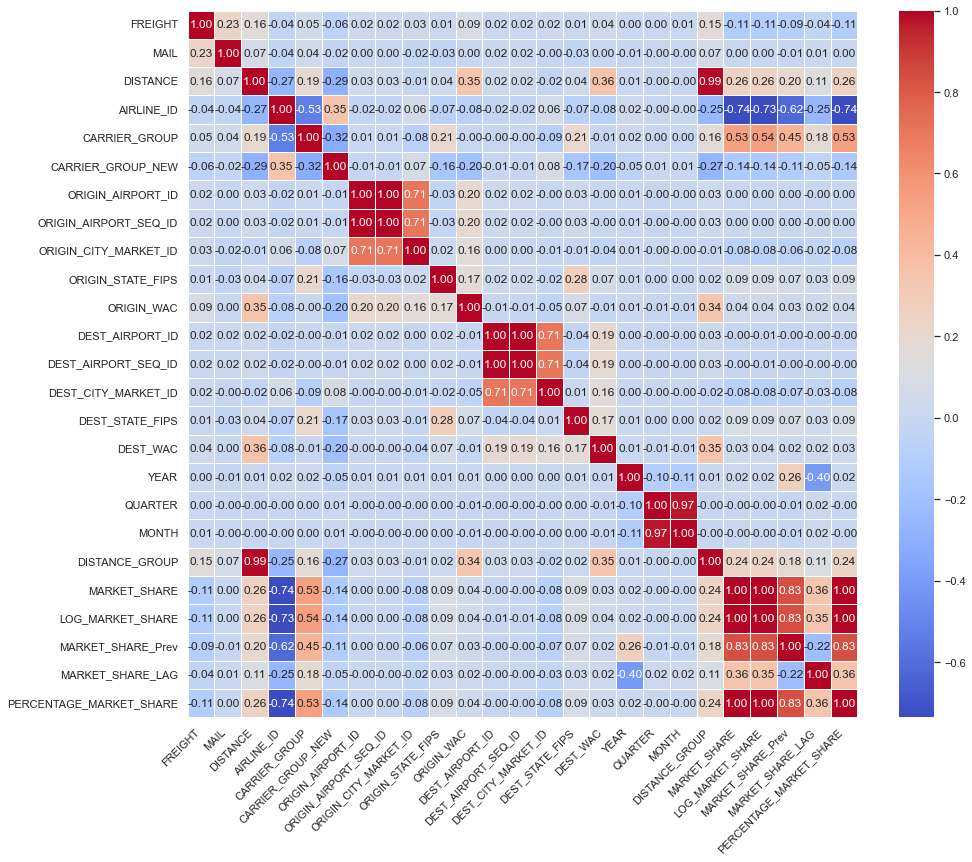

In [71]:

correlation_matrix = df_combined.corr()

plt.figure(figsize=(15, 13))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [47]:
df_combined.head()

,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,...,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,MARKET_SHARE,LOG_MARKET_SHARE,MARKET_SHARE_Prev,MARKET_SHARE_LAG,PERCENTAGE_MARKET_SHARE
0,0.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,06971,D,2E,Smokey Bay Air Inc.,...,1,3,1,L,DU,0.000021,0.000021,0.0,0.000021,0.002125
1,0.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,06971,D,2E,Smokey Bay Air Inc.,...,4,10,1,L,DU,0.000021,0.000021,0.0,0.000021,0.002125
2,0.0,0.0,10.0,2E,20319.0,Smokey Bay Air Inc.,06971,D,2E,Smokey Bay Air Inc.,...,2,6,1,F,DU,0.000021,0.000021,0.0,0.000021,0.002125
3,0.0,0.0,10.0,2E,20319.0,Smokey Bay Air Inc.,06971,D,2E,Smokey Bay Air Inc.,...,3,7,1,F,DU,0.000021,0.000021,0.0,0.000021,0.002125
4,0.0,0.0,10.0,2E,20319.0,Smokey Bay Air Inc.,06971,D,2E,Smokey Bay Air Inc.,...,4,12,1,F,DU,0.000021,0.000021,0.0,0.000021,0.002125


In [48]:
#df_combined['MARKET_SHARE_LAG1'] = df_combined.groupby(['AIRLINE_ID'])['MARKET_SHARE'].shift(12)  # Assuming monthly data

In [49]:
#df_combined.to_csv(f'df{i}_output.csv', index=False)

In [50]:
# Training set (2018-2021)
train_data = df_combined[df_combined['YEAR'].isin([2018, 2019, 2020,2021])]

# Testing set (2022-2023)
test_data = df_combined[df_combined['YEAR'].isin([2022, 2023])]


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

target_variable = 'MARKET_SHARE'


# Feature selection - include relevant features
features = [ 'CARRIER_GROUP', 'FREIGHT','DISTANCE', 'ORIGIN_WAC', 'DEST_WAC']


# Split features and target variable
X_train, y_train = train_data[features], train_data[target_variable]
X_test, y_test = test_data[features], test_data[target_variable]

# Initialize a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


In [52]:
r_squared = r2_score(y_test, predictions)

mse = mean_squared_error(y_test, predictions)

print(f'R-squared (R²): {r_squared}')
print(f'Mean Squared Error (MSE): {mse}')

R-squared (R²): 0.3352543747034419
Mean Squared Error (MSE): 0.004155309115112647


In [53]:
model.score(X_test,y_test)

0.3352543747034419

In [54]:
from sklearn.linear_model import Lasso
lasso_base = Lasso(alpha = 1)
lasso_base.fit(X_train, y_train)
y_pred_test = lasso_base.predict(X_test)
print(lasso_base.score(X_test, y_test))
lasso_base.coef_, lasso_base.intercept_


0.07307924457855108


(array([ 0.00000000e+00, -1.59946871e-08,  2.03181829e-05, -0.00000000e+00,
        -0.00000000e+00]),
 0.05020538390466017)

In [55]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


# 1. Define a list of parameters (key is 'alpha')

lasso_params = { 'alpha' :  [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10] }
 
# 2. Define function and fit the data

lasso = Lasso()

lasso_grid = GridSearchCV(lasso, lasso_params, cv = 5)

lasso_grid.fit(X_train, y_train)

# 3.1 Present performance measure

## 3.1a: unbiased performance measure in R2

print(lasso_grid.score(X_test, y_test))



0.3347214174405684


In [56]:
ridge_base = Ridge(alpha = 1)

ridge_base.fit(X_train, y_train)

y_pred_test = ridge_base.predict(X_test)

print(ridge_base.score(X_test, y_test))

ridge_base.coef_, ridge_base.intercept_

## Grid Search with CV
 
# 1. Define a list of parameters (key is 'alpha')

ridge_params = { 'alpha' :  [1] }
 
# 2. Define function and fit the data

ridge = Ridge()

ridge_grid = GridSearchCV(ridge, ridge_params, cv = 5)

ridge_grid.fit(X_train, y_train)

0.3352543618592816


GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [1]})

In [57]:
## 3.1b: performance measure based on which hyperparameter is chosen (R2)

print(lasso_grid.best_score_)

# 3.2 find best hyperparameters

print(lasso_grid.best_params_)

# 3.3 find best parameter estimates

# First get optimal model

lasso_grid.best_estimator_.coef_, lasso_grid.best_estimator_.intercept_

# Model and prediction


 
# 3.1 Present performance measure

## 3.1a: unbiased performance measure in R2

print(ridge_grid.score(X_test, y_test))

## 3.1b: performance measure based on which hyperparameter is chosen (R2)

print(ridge_grid.best_score_)

# 3.2 find best hyperparameters

print(ridge_grid.best_params_)

# 3.3 find best parameter estimates

# First get optimal model

ridge_grid.best_estimator_.coef_, ridge_grid.best_estimator_.intercept_


0.21646843593288234
{'alpha': 0.001}
0.3352543618592816
0.21450091017789533
{'alpha': 1}


(array([ 4.62130558e-02, -1.71490648e-08,  1.50516043e-05, -1.81104079e-05,
        -2.59277220e-05]),
 -0.05609508185408009)

In [58]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Regression MSE: {mse_gb}")
print(f"Gradient Boosting Regression R-squared: {gb_reg.score(X_test, y_test)}")

Gradient Boosting Regression MSE: 0.002824770276801512
Gradient Boosting Regression R-squared: 0.5481073412463447


In [60]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regression MSE: {mse_rf}")
print(f"Random Forest Regression R-squared: {rf_reg.score(X_test, y_test)}")


Random Forest Regression MSE: 0.001582123350333686
Random Forest Regression R-squared: 0.7468997981428536


In [61]:
#features = [ 'CARRIER_GROUP', 'FREIGHT','DISTANCE', 'ORIGIN_WAC', 'DEST_WAC']

In [62]:
sample_input = { 'CARRIER_GROUP' : 7, 'FREIGHT': 1200,'DISTANCE': 4983, 'ORIGIN_WAC': 22 , 'DEST_WAC' : 4}
sample_df = pd.DataFrame([sample_input])
predicted_log_market_share = rf_reg.predict(sample_df)
print(predicted_log_market_share)

[0.14995851]


In [63]:
df_combined.describe()

,FREIGHT,MAIL,DISTANCE,AIRLINE_ID,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,...,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,MARKET_SHARE,LOG_MARKET_SHARE,MARKET_SHARE_Prev,MARKET_SHARE_LAG,PERCENTAGE_MARKET_SHARE
count,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.333026e+06,...,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06,1.425887e+06
mean,1.190912e+05,4.881661e+03,9.762102e+02,2.013671e+04,2.481634e+00,3.154188e+00,1.279879e+04,1.279883e+06,3.209298e+04,2.559874e+01,...,7.202033e+01,2.020349e+03,2.438134e+00,6.306178e+00,2.492234e+00,6.925389e-02,6.443367e-02,5.566835e-02,1.358553e-02,6.925389e+00
std,7.350577e+05,3.708963e+04,1.052173e+03,5.230591e+02,8.348922e-01,1.117415e+00,1.599987e+03,1.599986e+05,1.517265e+03,1.796455e+01,...,1.207428e+02,1.694784e+00,1.108517e+00,3.423382e+00,2.084489e+00,7.720129e-02,7.054628e-02,7.404071e-02,4.402163e-02,7.720129e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.939300e+04,0.000000e+00,0.000000e+00,1.000100e+04,1.000101e+06,3.000100e+04,1.000000e+00,...,1.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.405285e-02,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.180000e+02,1.980500e+04,2.000000e+00,3.000000e+00,1.129800e+04,1.129806e+06,3.085200e+04,8.000000e+00,...,3.300000e+01,2.019000e+03,1.000000e+00,3.000000e+00,1.000000e+00,4.672578e-04,4.671486e-04,0.000000e+00,-1.136577e-04,4.672578e-02
50%,0.000000e+00,0.000000e+00,7.010000e+02,2.023700e+04,3.000000e+00,3.000000e+00,1.289200e+04,1.289208e+06,3.170300e+04,2.500000e+01,...,4.400000e+01,2.020000e+03,2.000000e+00,6.000000e+00,2.000000e+00,3.119692e-02,3.072019e-02,1.761428e-02,1.065548e-04,3.119692e+00
75%,3.010000e+03,0.000000e+00,1.223000e+03,2.039800e+04,3.000000e+00,3.000000e+00,1.410700e+04,1.410702e+06,3.319500e+04,4.200000e+01,...,8.200000e+01,2.022000e+03,3.000000e+00,9.000000e+00,3.000000e+00,1.552974e-01,1.443578e-01,1.104108e-01,4.836358e-03,1.552974e+01
max,1.050779e+08,1.819831e+06,1.032900e+04,2.211900e+04,3.000000e+00,9.000000e+00,1.699300e+04,1.699301e+06,3.694200e+04,7.800000e+01,...,9.610000e+02,2.023000e+03,4.000000e+00,1.200000e+01,2.100000e+01,2.044364e-01,1.860118e-01,2.044364e-01,2.044364e-01,2.044364e+01


In [64]:
df_combined.shape

(1425887, 45)